The data used in the notebook can be found in:

Pappalardo, Luca; Massucco, Emanuele (2019): Soccer match event dataset. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4415000.v5
A detailed description of the data can be found in the following paper (please cite it if you use the data or the following code):

Pappalardo, L., Cintia, P., Rossi, A. et al. A public data set of spatio-temporal match events in soccer competitions. Scientific Data 6, 236 (2019) doi:10.1038/s41597-019-0247-7, https://www.nature.com/articles/s41597-019-0247-7


### Loading libraries

In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt

with open('events/events_England.json') as f:
    data = json.load(f)

In [2]:
train = pd.DataFrame(data)

### Data Exploration:

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643150 entries, 0 to 643149
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   eventId       643150 non-null  int64  
 1   subEventName  643150 non-null  object 
 2   tags          643150 non-null  object 
 3   playerId      643150 non-null  int64  
 4   positions     643150 non-null  object 
 5   matchId       643150 non-null  int64  
 6   eventName     643150 non-null  object 
 7   teamId        643150 non-null  int64  
 8   matchPeriod   643150 non-null  object 
 9   eventSec      643150 non-null  float64
 10  subEventId    643150 non-null  object 
 11  id            643150 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 58.9+ MB


In [4]:
train.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


As we can see, there are sub-event names for every event. Let's explore the main column of events (eventName)

In [5]:
event_names = []
event_values = []

for event in train['eventName'].unique():
    event_names.append(event)
    event_values.append(len(train[train['eventName']==event]))  
    

unsorted_list = [(event_value,event_name) for event_name,event_value in zip(event_names,event_values)]

sorted_list = sorted(unsorted_list)

In [6]:
sorted_list

[(1266, 'Goalkeeper leaving line'),
 (1558, 'Offside'),
 (3349, 'Save attempt'),
 (8138, 'Foul'),
 (8451, 'Shot'),
 (27535, 'Interruption'),
 (36423, 'Free Kick'),
 (51085, 'Others on the ball'),
 (176688, 'Duel'),
 (328657, 'Pass')]

Now we can go ahead and plot a bar graph that depicts the percentage of different types of events that occur throughout the season:

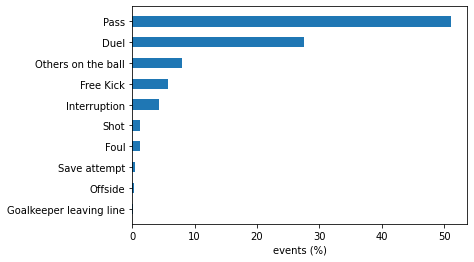

In [7]:
name_sorted = []
value_sorted = []
for i in sorted_list:
    name_sorted += [i[1]]
    value_sorted += [i[0]]

bar_width = [x/sum(value_sorted)*100 for x in value_sorted]
bar_pos = np.arange(len(name_sorted))+.75

fig,ax = plt.subplots()
ax.barh(bar_pos,bar_width,0.5)
plt.xlabel('events (%)')
ax.set_yticks(bar_pos)
ax.set_yticklabels(name_sorted)
plt.show()

The above bar graph shows that about 50% of the events were passes, while duels were the 2nd most - which seems reasonable. 

Let's go ahead and investigate the most common event - passes.

# Explore Passes


In [8]:
from plot_utils import *

#plot one event on the field
pass_df = train[train['eventName']=='Pass']

pass_df['x_start'] = [x[0]['x'] for x in pass_df['positions']]
pass_df['y_start'] = [x[0]['y'] for x in pass_df['positions']]

<ipython-input-8-732f0bf40f4f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-732f0bf40f4f>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
pass_df

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x_start,y_start
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171,49,49
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172,31,78
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173,51,75
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174,35,71
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175,41,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643134,8,Simple pass,[{'id': 1801}],8313,"[{'y': 63, 'x': 65}, {'y': 96, 'x': 61}]",2500098,Pass,1633,2H,2760.286946,85,251596219,65,63
643135,8,Simple pass,[{'id': 1801}],379209,"[{'y': 96, 'x': 61}, {'y': 85, 'x': 40}]",2500098,Pass,1633,2H,2763.698599,85,251596221,61,96
643141,8,Simple pass,[{'id': 1801}],8561,"[{'y': 70, 'x': 59}, {'y': 89, 'x': 53}]",2500098,Pass,1633,2H,2783.137836,85,251596225,59,70
643142,8,High pass,[{'id': 1801}],20620,"[{'y': 89, 'x': 53}, {'y': 72, 'x': 99}]",2500098,Pass,1633,2H,2785.702032,83,251596226,53,89


As we can see, the Pass dataframe includes various types of passes, and provides the starting co-ordinates of the respective pass. The code that was executed above simply took the starting x & y coordinates from the 'positions' column, and added it to two seperate columns called 'x_start' and 'y_start' respectively.

Let's now visualize  passes that occured in some random match using a valid match id.

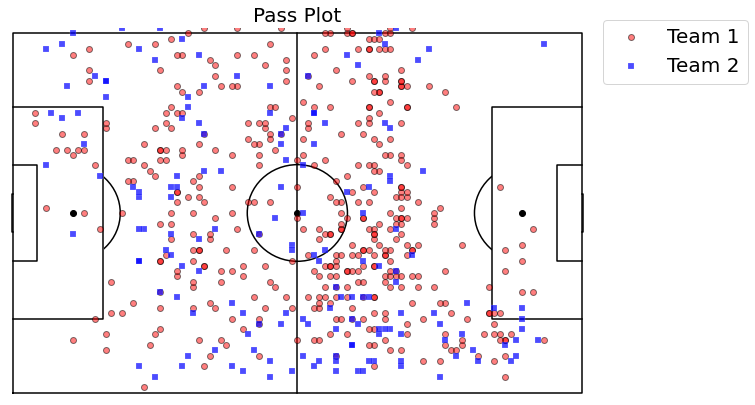

In [10]:
random_match = pass_df[pass_df['matchId']==2499719]

team1,team2=random_match['teamId'].unique()

team1_df = random_match[random_match['teamId']==team1]
team2_df = random_match[random_match['teamId']==team2]

f = draw_pitch("white", "black", "h", "full")
plt.scatter(team1_df['x_start'], team1_df['y_start'], c='red', edgecolors="k", zorder=12, 
            alpha=0.5, label='Team 1')
plt.scatter(team2_df['x_start'], team2_df['y_start'], marker='s', c='blue', edgecolors="w", linewidth=0.25, zorder=12, 
            alpha=0.7, label='Team 2')
plt.legend(fontsize=20, bbox_to_anchor=(1.01, 1.05))
plt.title('Pass Plot', fontsize=20)
plt.show()

The following function was created so that we can visualize all types of events, and not just passes, from a certain match. Remember, there are 10 types of events under the column 'eventName'.


In [11]:
#then function to plot given event of given match
def plot_event(event_name,match_id):
    
    event_df = train[train['eventName']==event_name]
    
    event_df['x_start'] = [x[0]['x'] for x in event_df['positions']]
    event_df['y_start'] = [x[0]['y'] for x in event_df['positions']]
    
    random_match = event_df[event_df['matchId']==match_id]
    team1,team2 = random_match['teamId'].unique()
    
    team1_df = random_match[random_match['teamId']==team1]
    team2_df = random_match[random_match['teamId']==team2]

    f = draw_pitch("white", "black", "h", "full")
    plt.scatter(team1_df['x_start'], team1_df['y_start'], c='red', edgecolors="k", zorder=12, 
                alpha=0.5, label='Team 1')
    plt.scatter(team2_df['x_start'], team2_df['y_start'], marker='s', c='blue', edgecolors="w", linewidth=0.25, zorder=12, 
                alpha=0.7, label='Team 2')
    plt.legend(fontsize=20, bbox_to_anchor=(1.01, 1.05))
    plt.title(event_name+' Plot', fontsize=20)
    plt.show()

<ipython-input-11-2794b2fd74de>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-2794b2fd74de>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



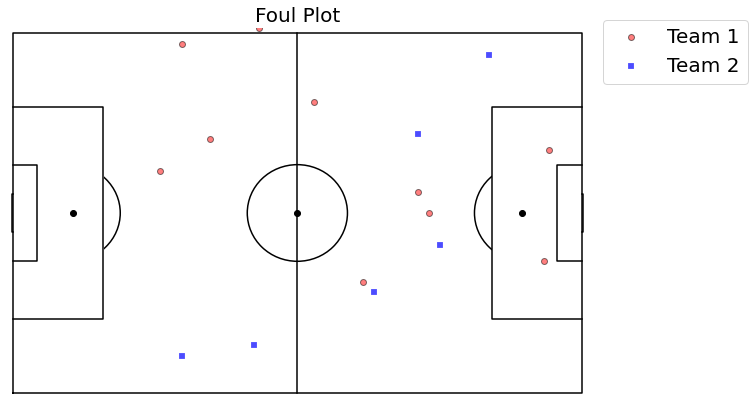

In [12]:
plot_event('Foul',2499719)

There can be improvements made to the above function by adding more parameters to increase options of changing the vizualization - either by including all matches or by adding a teamId parameter to restrict plots just to that team etc.  

The following code uses the function above to plot interruptions and fouls occured during a certain match.

# Explore Shots

The idea is to visualize shot-events & goal-events throughout the season to see where the goal-scoring opportunities occured. We will build on these plots to go on and explain the concept behind 'Expected Goals'. 

In [13]:
cond1=train.subEventName=='Shot'
shots = train[(cond1)] #taking only shots and not free-kick shots for now

In [14]:
shots.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280
128,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289
249,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429


## Processing shots to include only non-header shots

The following code will filter out the Shots dataframe to include shots that are *not* headers or free-kicks, while also creating a column 'goal'- if the shots were goals.

In [15]:
header_shots_index = set()
goal_shots_index = set()
for i in shots.index:
    for id_list in shots['tags'][i]:
        for key,id_value in id_list.items():
            if(id_value==403):
                #append index value to list
                header_shots_index.add(i)  
            elif(id_value==101):
                goal_shots_index.add(i)
                

shots.loc[goal_shots_index,['goal']] = True 

#dropping header-shots rows
shots = shots.drop(sorted(header_shots_index))

shots['goal'] = shots['goal'].fillna(False)

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
shots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,goal
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212,True
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247,False
128,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289,False
249,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429,False
394,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 1802}]",7945,"[{'y': 39, 'x': 90}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,1286.061650,100,177959606,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
642939,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 1802}]",265318,"[{'y': 40, 'x': 86}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,1933.702081,100,251596050,False
642945,10,Shot,"[{'id': 401}, {'id': 1212}, {'id': 1802}]",8561,"[{'y': 45, 'x': 72}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,1972.969422,100,251596053,False
643023,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",41174,"[{'y': 33, 'x': 86}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,2193.887080,100,251596096,True
643051,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",7879,"[{'y': 62, 'x': 88}, {'y': 100, 'x': 100}]",2500098,Shot,1623,2H,2377.197700,100,251596357,False


The Shots dataframe now contains only shooting oppurtinites that are not headers or free-kicks.

#### Plotting shots and goals in all matches in the season:

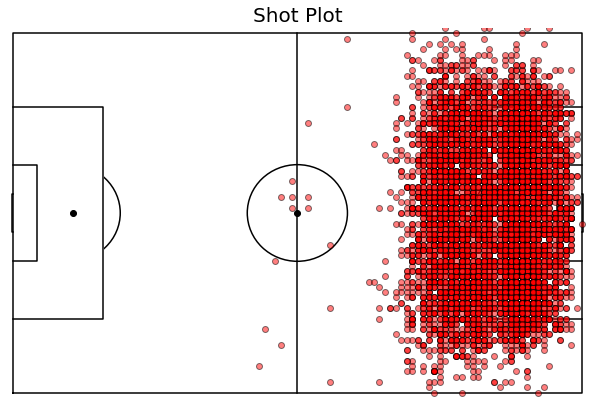

In [17]:
shots['x_start'] = [x[0]['x'] for x in shots['positions']]
shots['y_start'] = [x[0]['y'] for x in shots['positions']]

f = draw_pitch("white", "black", "h", "full")
plt.scatter(shots['x_start']+4, abs(shots['y_start']-15), c='red', edgecolors="k", zorder=12, 
                alpha=0.5)
plt.title('Shot Plot', fontsize=20)
plt.show()

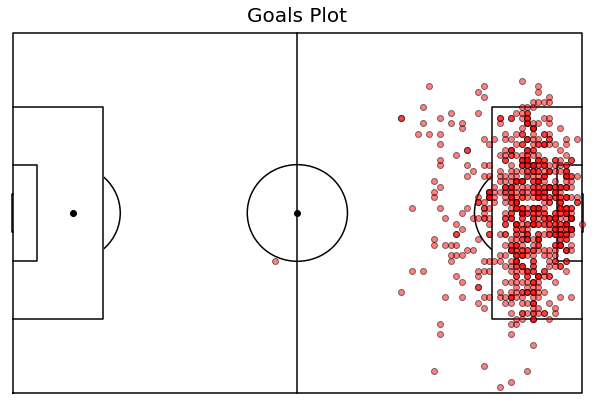

In [18]:
goals_df = shots[shots['goal']==True]

f = draw_pitch("white", "black", "h", "full")
plt.scatter(goals_df['x_start']+4, abs(goals_df['y_start']-15), c='red', edgecolors="k", zorder=12, 
                alpha=0.5)
plt.title('Goals Plot', fontsize=20)
plt.show()

## Naive Expected Goals (xG):

- The probablitiy of scoring from different areas of the pitch - that's what the XGmodel will build on. 
- This probability can be calculated by goals/shots from every point of the pitch 
- Every point of goals/shots = frequency of scoring from different places. This is what will be plotted next:


In [19]:
#Two dimensional histogram
H_Shot=np.histogram2d(100-shots['x_start'], shots['y_start'],bins=50,range=[[0, 100],[0, 100]])

H_Goal=np.histogram2d(100-goals_df['x_start'], goals_df['y_start'],bins=50,range=[[0, 100],[0, 100]])


<ipython-input-20-393e9708816e>:45: RuntimeWarning:

invalid value encountered in true_divide



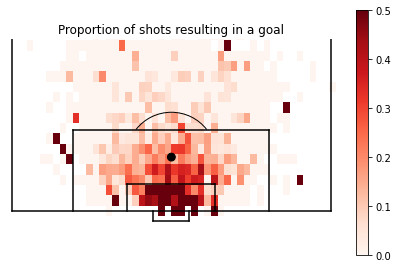

In [20]:
from matplotlib.patches import Arc


fig=plt.figure()
ax=fig.add_subplot(1,1,1)

linecolor='black'

#Pitch Outline & Centre Line
plt.plot([0,65],[0,0], color=linecolor)
plt.plot([65,65],[50,0], color=linecolor)
plt.plot([0,0],[50,0], color=linecolor)

#Left Penalty Area
plt.plot([12.5,52.5],[16.5,16.5],color=linecolor)
plt.plot([52.5,52.5],[16.5,0],color=linecolor)
plt.plot([12.5,12.5],[0,16.5],color=linecolor)

#Left 6-yard Box
plt.plot([41.5,41.5],[5.5,0],color=linecolor)
plt.plot([23.5,41.5],[5.5,5.5],color=linecolor)
plt.plot([23.5,23.5],[0,5.5],color=linecolor)

#Goal
plt.plot([41.5-5.34,41.5-5.34],[-2,0],color=linecolor)
plt.plot([23.5+5.34,41.5-5.34],[-2,-2],color=linecolor)
plt.plot([23.5+5.34,23.5+5.34],[0,-2],color=linecolor)

#Prepare Circles
leftPenSpot = plt.Circle((65/2,11),0.8,color=linecolor)

#Draw Circles
ax.add_patch(leftPenSpot)

#Prepare Arcs
leftArc = Arc((32.5,11),height=18.3,width=18.3,angle=0,theta1=38,theta2=142,color=linecolor)

#Draw Arcs
ax.add_patch(leftArc)

#Tidy Axes
plt.axis('off')

#f=draw_pitch("white", "black", "h", "full")
pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)
fig.colorbar(pos, ax=ax)
ax.set_title('Proportion of shots resulting in a goal')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

While this plot shows a pattern of good goalscoring opportunities, there are some outliers. Some of the shots from outside the box are given a high **xG** because of a low proportion of shots from that point. So a point futher out could have 1 goal out of 2 shots taken from that point - giving a high **xG** rating. 


# How to build on this simple model

- The outliers explained above need smoothening out. 
- One way of smothening out the proportion of shots xG model is by taking into account the angle of shot to goal, as well as its distance. 
- Angle is an important concept in shooting and is a nice way to take into account distance as well. 
- The more the angle you have to shoot, the better chance of scoring.


# Inspiration 

I have taken the pitch drawing code, as well as a lot of inspiration, from the following notebooks as part of a football analytics course:

- https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython/blob/master/3xGModel.py
- https://github.com/Friends-of-Tracking-Data-FoTD/mapping-match-events-in-Python/blob/master/data_exploration.ipynb